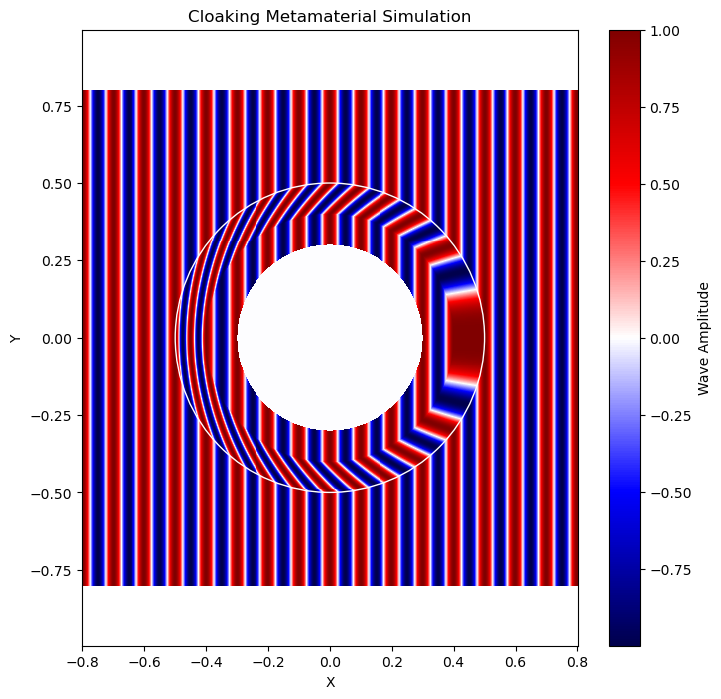

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Constants 
wavelength = 0.1  # Wavelength 
k = 2 * np.pi / wavelength  # Wave number
amplitude = 1  # Amplitude 

#  grid for simulation
x = np.linspace(-0.8, 0.8, 500)
y = np.linspace(-0.8, 0.8, 500)
X, Y = np.meshgrid(x, y)

# circular object and the metamaterial ring (cloaking device)
object_radius = 0.3
cloak_radius_outer = 0.5  # Outer radius of the cloaking device
cloak_radius_inner = 0.4  # Inner radius of the cloaking device

# place the object and cloaking device on the grid
r = np.sqrt(X**2 + Y**2)
object_area = r <= object_radius
cloak_area = np.logical_and(cloak_radius_inner < r, r <= cloak_radius_outer)

# Animation function
def update(frame):
    plt.clf()
    # Incident plane wave with time-varying phase
    incident_wave = amplitude * np.exp(1j * (k * X - frame))

    # Apply the cloaking effect
    cloaked_wave = np.copy(incident_wave)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            if cloak_area[i, j]:
                # The phase and amplitude manipulation by the metamaterial
                dist = np.sqrt(X[i, j]**2 + Y[i, j]**2)
                phase_shift = k * (cloak_radius_outer - dist)
                cloaked_wave[i, j] = amplitude * np.exp(1j * (k * X[i, j] - frame + phase_shift))
            elif object_area[i, j]:
                # Wave is absorbed or blocked by the object
                cloaked_wave[i, j] = 0

    # Calculate the real part of the wave for visualization
    real_wave = np.real(cloaked_wave)

    # Plotting
    plt.pcolormesh(X, Y, real_wave, shading='auto', cmap='seismic')
    plt.colorbar(label='Wave Amplitude')

    # Outline the cloak
    cloak_outline = plt.Circle((0, 0), cloak_radius_outer, color='white', fill=False)
    plt.gca().add_artist(cloak_outline)

    plt.title('Cloaking Metamaterial Simulation')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.axis('equal')

# Create animation
fig = plt.figure(figsize=(8, 8))
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 100), interval=50)

video = ani.to_html5_video()
html = HTML(video)  # Correct usage
display(html)
